# Imputacion de Datos Faltantes para la Precipitacion del Meta mediante modelacion KNN

Este Jupyter Notebook se enfoca en el desarrolo metodologico del trabajo de grado de los estudiantes Ronaldo Hernandez Mejia y Hector Freddy Velasco, en el cual se enfoca en la imputaciopn de datos faltnates para la variable de precipitacion en el departamento del Meta, Colombia. Con una gran volumen de datos de la informacion diaria de la precipitacion desde 1980 hasta el 2016, seleccionando un total de 56 Estaciones meteorologias del IDEAM.

La región del Meta es muy importante en este país por la diversidad del clima y su efecto sobre la agricultura y otros sectores económicos. La variabilidad de las precipitaciones juega un papel importante en el análisis del clima y la toma de decisiones relacionadas con  la gestión del agua y el clima. 

El objetivo principal es desarrolar un modelo basado en el algotimo K-Nearest Neighbors(KNN) para imputar los datos faltantes de precipitacion, utilizando un conjunto de datos que contiene mas de 700.000 observaciones. 

Dada la gran cantidad de datos se ha implementado una version que utiliza los cores del procesador para ejecutar el modelo en paralelo optimizando asi el tiempo de ejecucion, mejorando la eficiencia computacional y acelerar el proceso, tambien por este motivo el desarrolo en python tiene tiempos de respuesta cortos en el manejo de datos.



### instalacion de librerias

#### **Pandas:**

pandas es una biblioteca esencial de Python para la manipulación y el análisis de datos. Ofrece estructuras de datos como DataFrames y Series que simplifican la gestión de datos tabulares y temporales, respectivamente.

#### **IPython:**

Es un shell interactivo que añade funcionalidades extra al modo estándar de Python, como resaltado de líneas y errores mediante colores, una sintaxis adicional y un sistema de "mágias".


#### **Pandasgui:**

Es una interfaz gráfica de usuario (GUI) para visualizar DataFrames de pandas. Permite un análisis exploratorio de datos de manera intuitiva y visual.

#### **NumPy:**

Es la biblioteca fundamental para la computación científica en Python. Proporciona estructuras de datos de alto rendimiento, como arrays, y herramientas para trabajar con ellos.

#### **Matplotlib:**

Es una biblioteca de visualización en Python, que proporciona una plataforma robusta para representar gráficos y figuras en diversos formatos y ambientes.

#### **Joblib:**

Es una herramienta para proporcionar serialización ligera en Python. Es especialmente útil para objetos que incluyen grandes arrays de datos, como modelos de machine learning entrenados con scikit-learn

#### **scikit-learn**
scikit-learn es una de las bibliotecas más utilizadas en Python para aprendizaje automático. Ofrece herramientas simples y eficientes para análisis de datos y modelado estadístico.


## 2.1 Importing the libraries and dataset:

In [5]:
import subprocess
import sys
import importlib

def install_and_import(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    finally:
        globals()[package] = importlib.import_module(package)


In [6]:
packages = ['pandas', 'IPython', 'pandasgui', 'numpy', 'matplotlib','joblib','sklearn']

for package in packages:
    install_and_import(package)


En caso de que no funcione instalacion manual:

In [3]:
pip install -U pip 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ronal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install wheel


Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
#observar donde estoy en ruta 
os.getcwd()

'f:\\TESIS\\Proyecto_mod_precipitacion\\Codigos de Python'

Ruta Ronaldo 

In [8]:
import os
current_path = os.getcwd()
print(f"Ruta actual del directorio de trabajo: {current_path}")
new_path = "F:\\TESIS\\Proyecto_mod_precipitacion"
os.chdir(new_path)
new_current_path = os.getcwd()
print(f"Nueva ruta del directorio de trabajo: {new_current_path}")

Ruta actual del directorio de trabajo: f:\TESIS\Proyecto_mod_precipitacion\Codigos de Python
Nueva ruta del directorio de trabajo: F:\TESIS\Proyecto_mod_precipitacion


Ruta hector 

In [7]:
import os
current_path = os.getcwd()
print(f"Ruta actual del directorio de trabajo: {current_path}")
new_path = "c:\\Users\\vhect\\Documents\\semestre 10\\TESIS\\Proyecto_mod_precipitacion"
os.chdir(new_path)
new_current_path = os.getcwd()
print(f"Nueva ruta del directorio de trabajo: {new_current_path}")

Ruta actual del directorio de trabajo: c:\Users\vhect\Documents\semestre 10\TESIS\Proyecto_mod_precipitacion\Codigos de Python
Nueva ruta del directorio de trabajo: c:\Users\vhect\Documents\semestre 10\TESIS\Proyecto_mod_precipitacion


### Ejemplo sencillo del funcionamiento del modelo KNN

modelo KNN 
scikit-learn es una biblioteca de aprendizaje automático de código 
abierto que ofrece implementaciones eficientes de una amplia variedad
de algoritmos de aprendizaje, incluyendo KNN. Además, proporciona funciones
para la imputación de datos faltantes utilizando KNN y otras técnicas.

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


In [6]:

def impute_precipitation_for_station(station_data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[['precipitation']])
    station_data['precipitation_imputed'] = station_data_imputed
    return station_data

# Crear datos de ejemplo
data = pd.DataFrame({
    'station_id': [1, 1, 2, 2, 3, 3],
    'precipitation': [1, np.nan, 3, 4, np.nan, 6]
})

stations = data['station_id'].unique()
imputed_data = pd.DataFrame()

for station in stations:
    station_data = data[data['station_id'] == station]
    station_data_imputed = impute_precipitation_for_station(station_data)
    imputed_data = imputed_data.append(station_data_imputed)


C:\Users\ronal\AppData\Local\Temp\ipykernel_25356\60805419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['precipitation_imputed'] = station_data_imputed
C:\Users\ronal\AppData\Local\Temp\ipykernel_25356\60805419.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imputed_data = imputed_data.append(station_data_imputed)
C:\Users\ronal\AppData\Local\Temp\ipykernel_25356\60805419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Presenta el Dataframe con las variables imputadas atravez de la metodologia KNN

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Tu código
print(imputed_data)

   station_id  precipitation  precipitation_imputed
0           1            1.0                    1.0
1           1            NaN                    1.0
2           2            3.0                    3.0
3           2            4.0                    4.0
4           3            NaN                    6.0
5           3            6.0                    6.0


### Lectura de datos

In [30]:
import pandas as pd

In [42]:
data = pd.read_csv("Datos/datos_seleccionados_para_modelo_coordenadas.txt",sep=";")
data.head(10)


,Date,prec,ID,LAT,LON
0,1983-06-09,6.8,32010010,2.562833,-74.103083
1,1983-06-10,17.8,32010010,2.562833,-74.103083
2,1983-06-11,0.0,32010010,2.562833,-74.103083
3,1983-06-12,0.5,32010010,2.562833,-74.103083
4,1983-06-13,6.9,32010010,2.562833,-74.103083
5,1983-06-14,7.7,32010010,2.562833,-74.103083
6,1983-06-15,16.2,32010010,2.562833,-74.103083
7,1983-06-16,20.8,32010010,2.562833,-74.103083
8,1983-06-17,0.0,32010010,2.562833,-74.103083
9,1983-06-18,0.0,32010010,2.562833,-74.103083


Estructura de los datos

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB


Visualizacion de los datos faltantes 

<Figure size 720x432 with 0 Axes>

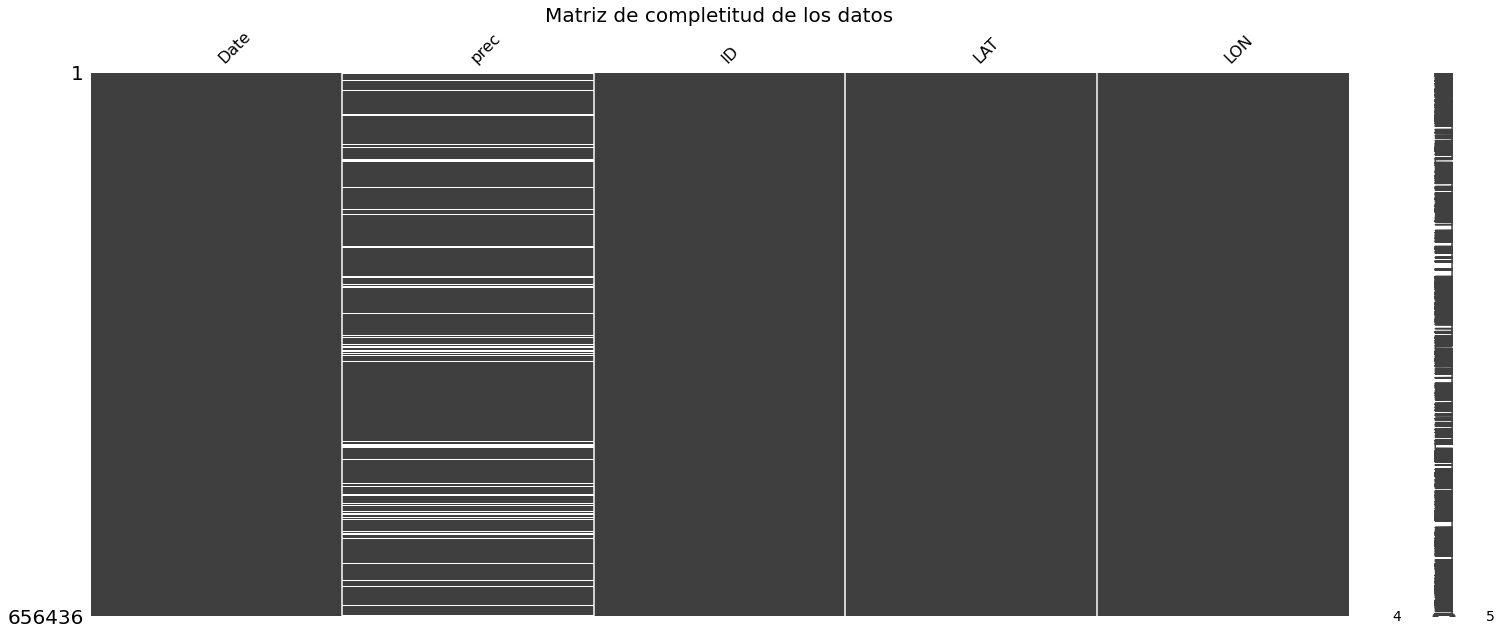

<Figure size 720x432 with 0 Axes>

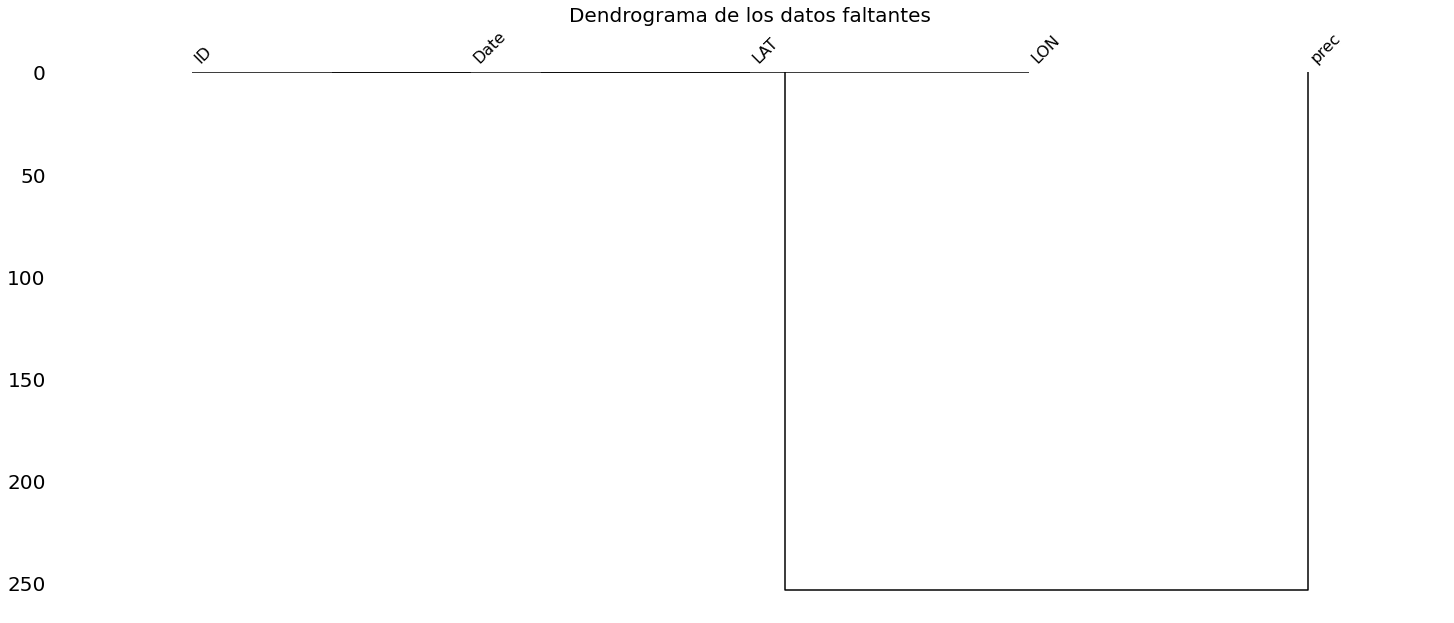

Date        0
prec    64312
ID          0
LAT         0
LON         0
dtype: int64


In [10]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Suponemos que 'data' es tu DataFrame

# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(data)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(data)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(data.isnull().sum())


### Correccion de variables para el modelo

In [45]:
data.head(5)

,Date,prec,ID,LAT,LON
0,1983-06-09,6.8,32010010,2.562833,-74.103083
1,1983-06-10,17.8,32010010,2.562833,-74.103083
2,1983-06-11,0.0,32010010,2.562833,-74.103083
3,1983-06-12,0.5,32010010,2.562833,-74.103083
4,1983-06-13,6.9,32010010,2.562833,-74.103083


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB


In [34]:
# Asegurarte de que 'Date' es una columna datetime
data['Date'] = pd.to_datetime(data['Date'])

# Crear nuevas columnas para el año, mes y día
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Crear un nuevo dataframe con las columnas deseadas
new_data = data[['ID', 'Year', 'Month', 'Day', 'prec', 'LAT', 'LON']].copy()


In [35]:
new_data = new_data.sort_values('ID')


In [36]:
new_data.head(10)

,ID,Year,Month,Day,prec,LAT,LON
0,32010010,1983,6,9,6.8,2.562833,-74.103083
8045,32010010,2005,6,18,8.0,2.562833,-74.103083
8046,32010010,2005,6,19,12.0,2.562833,-74.103083
8047,32010010,2005,6,20,0.0,2.562833,-74.103083
8048,32010010,2005,6,21,4.0,2.562833,-74.103083
8049,32010010,2005,6,22,0.0,2.562833,-74.103083
8050,32010010,2005,6,23,3.0,2.562833,-74.103083
8051,32010010,2005,6,24,41.0,2.562833,-74.103083
8052,32010010,2005,6,25,8.0,2.562833,-74.103083
8053,32010010,2005,6,26,3.0,2.562833,-74.103083


In [37]:
new_data = new_data.rename(columns={
    'Year': 'Año',
    'Month': 'Mes',
    'Day': 'Día',
    'prec': 'prec',
    'LAT': 'LAT',
    'LON': 'LON'
})


In [38]:
new_data = new_data[['Año', 'Mes', 'Día', 'prec', 'LAT', 'LON']]


In [39]:
new_data.head(5)

,Año,Mes,Día,prec,LAT,LON
0,1983,6,9,6.8,2.562833,-74.103083
8045,2005,6,18,8.0,2.562833,-74.103083
8046,2005,6,19,12.0,2.562833,-74.103083
8047,2005,6,20,0.0,2.562833,-74.103083
8048,2005,6,21,4.0,2.562833,-74.103083


In [40]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656436 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     656436 non-null  int64  
 1   Mes     656436 non-null  int64  
 2   Día     656436 non-null  int64  
 3   prec    592124 non-null  float64
 4   LAT     656436 non-null  float64
 5   LON     656436 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 35.1 MB


### Separacion de datos completos y faltantes

Surge de la necesidad de tener la data completa para tener el registro de los datos observados reales, los cuales son los que brindaran el soporte a las matricas estadisticas de desempeño como el RMSE,MAE,PRMSE

In [20]:
# Separar los datos completos de los datos con valores faltantes en 'Prec'
data_completa = new_data.dropna(subset=['prec'])
data_faltantes = new_data[new_data['prec'].isna()]


In [21]:
data_faltantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64312 entries, 8801 to 654274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     64312 non-null  int64  
 1   Mes     64312 non-null  int64  
 2   Día     64312 non-null  int64  
 3   prec    0 non-null      float64
 4   LAT     64312 non-null  float64
 5   LON     64312 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.4 MB


In [22]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Año     592124 non-null  int64  
 1   Mes     592124 non-null  int64  
 2   Día     592124 non-null  int64  
 3   prec    592124 non-null  float64
 4   LAT     592124 non-null  float64
 5   LON     592124 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 31.6 MB


Ahora para simular los datos faltantes reales del 8.27%, se imputaran el 10% de datos faltantes por medio de una funcion aletoria para un total de 59.212 datos faltantes, la funcion toma aletoriamente las posiciones de la variable seleccionada y realizara un extraccion de la informacion, dejando asi un registro faltante como resultado.

Esto con el objetivo de simular la situacion del modelo en una naturaleza de los datos completamente al azar 

In [23]:
import numpy as np

def insertar_nan_aleatoriamente(df, nombre_columna, fraccion):
    df = df.copy()
    df['Original'] = df[nombre_columna]
    indices_a_modificar = df[nombre_columna].dropna().sample(frac=fraccion).index
    df.loc[indices_a_modificar, nombre_columna] = np.nan
    return df

# Insertar aleatoriamente NaN en el 20% de los datos
data_completa_mod = insertar_nan_aleatoriamente(data_completa, 'prec', 0.1)


In [24]:
data_completa_mod.info()
data_completa_mod.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Año       592124 non-null  int64  
 1   Mes       592124 non-null  int64  
 2   Día       592124 non-null  int64  
 3   prec      532912 non-null  float64
 4   LAT       592124 non-null  float64
 5   LON       592124 non-null  float64
 6   Original  592124 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 52.3 MB


,Año,Mes,Día,prec,LAT,LON,Original
0,1983,6,9,6.8,2.562833,-74.103083,6.8
8045,2005,6,18,8.0,2.562833,-74.103083,8.0
8046,2005,6,19,12.0,2.562833,-74.103083,12.0
8047,2005,6,20,NaN,2.562833,-74.103083,0.0
8048,2005,6,21,4.0,2.562833,-74.103083,4.0
8049,2005,6,22,0.0,2.562833,-74.103083,0.0
8050,2005,6,23,NaN,2.562833,-74.103083,3.0
8051,2005,6,24,41.0,2.562833,-74.103083,41.0
8052,2005,6,25,8.0,2.562833,-74.103083,8.0
8053,2005,6,26,3.0,2.562833,-74.103083,3.0


Visualiuzacion datos faltantes para la data completa modificada

<Figure size 720x432 with 0 Axes>

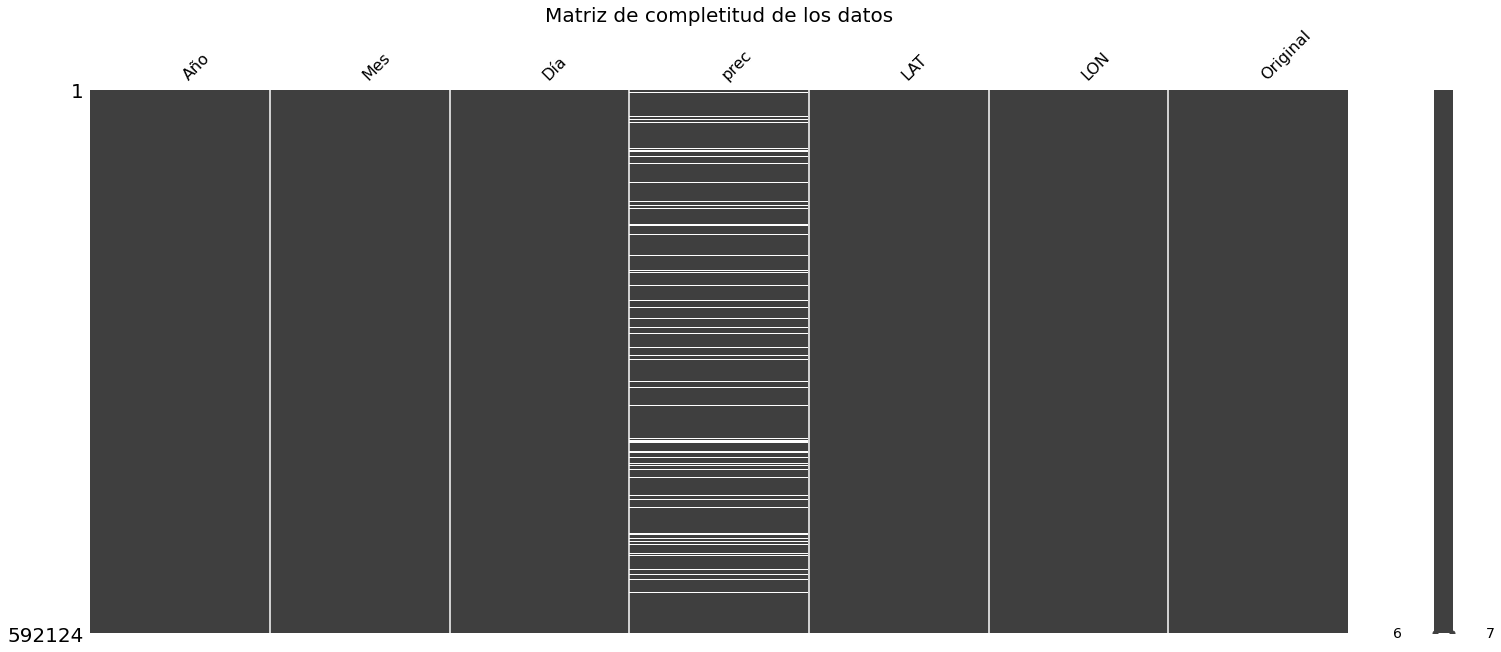

In [25]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Suponemos que 'data' es tu DataFrame

# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(data_completa_mod)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()


In [28]:
soloNAn=na_rows = data_completa_mod[data_completa_mod['prec'].isna()]
soloNAn

,Año,Mes,Día,prec,LAT,LON,Original
8048,2005,6,21,NaN,2.562833,-74.103083,4.0
8050,2005,6,23,NaN,2.562833,-74.103083,3.0
8022,2005,5,26,NaN,2.562833,-74.103083,27.0
8073,2005,7,16,NaN,2.562833,-74.103083,25.0
8076,2005,7,19,NaN,2.562833,-74.103083,3.0
...,...,...,...,...,...,...,...
654371,2008,11,22,NaN,4.260361,-72.564472,8.3
654372,2008,11,23,NaN,4.260361,-72.564472,0.7
654231,2008,7,5,NaN,4.260361,-72.564472,0.0
654234,2008,7,8,NaN,4.260361,-72.564472,1.3


## Prueba de aletoriedad 

In [33]:
import missingno as msno
import numpy as np
import scipy.stats as stats


AttributeError: module 'scipy.stats' has no attribute 'littles_test'

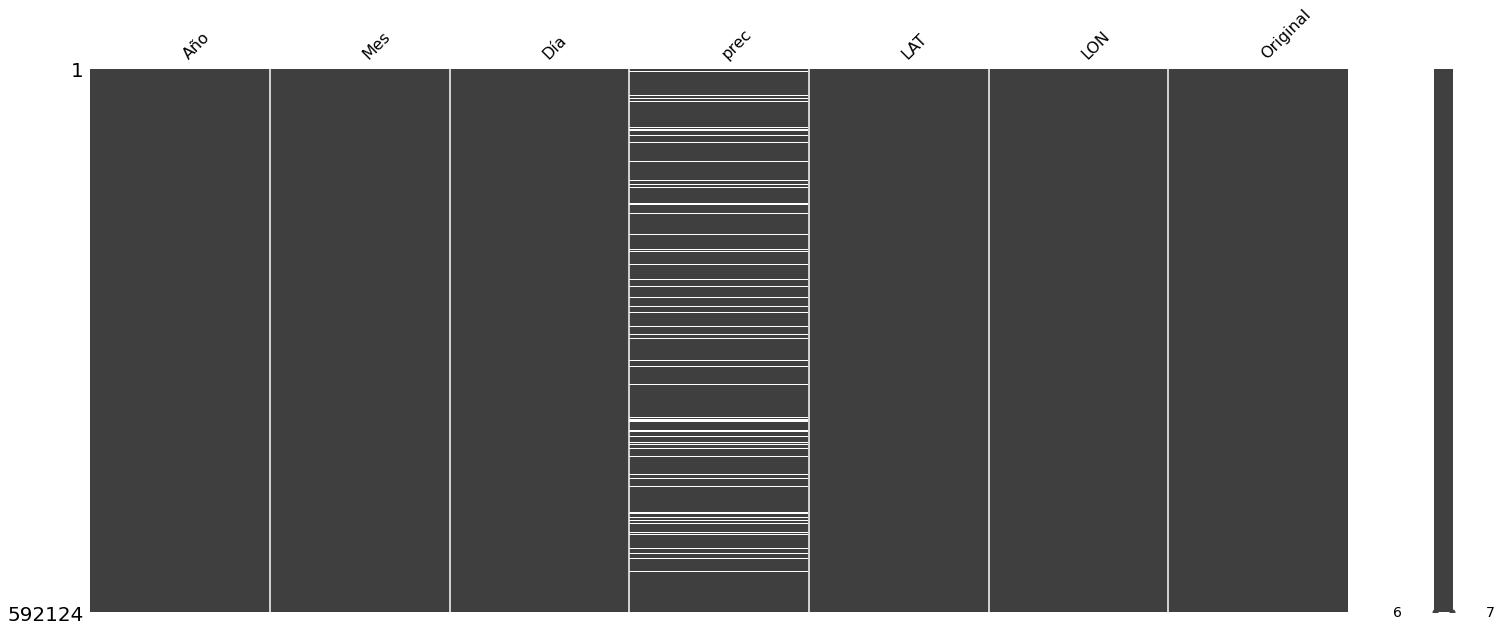

In [32]:
# Visualize the missing values
msno.matrix(data_completa_mod)

# Perform the Little's MCAR test
littles_test = stats.littles_test(data_completa_mod)

# Print the test results
print(littles_test)

AttributeError: module 'missingno' has no attribute 'mcar_test'

Aplicacion del modelo a los datos reales

Lectura de librerias necesarias para el modelo KNN para imputacion de datos faltantes en paralelizacion con CPU

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

### KNN Ejecucion

El algoritmo k-NN opera bajo la premisa de que una observación con valores desconocidos puede ser aproximada utilizando información de sus vecinos más cercanos en el espacio de características (Hastie et al., 2001). El proceso se puede desglosar en los siguientes pasos:

Preprocesamiento de Datos: Antes de aplicar k-NN, es esencial estandarizar los datos. Esta etapa es crucial ya que k-NN es un algoritmo basado en distancias y, por lo tanto, es sensible a la escala en la que se encuentren las diferentes características (Hastie et al., 2001).


Determinación del Parámetro 'k': El parámetro 'k' denota el número de vecinos que se utilizarán para la imputación. Si bien el valor óptimo de 'k' puede variar según el conjunto de datos y el contexto, estudios previos sugieren que un rango entre 3 y 10 suele ser adecuado (Troyanskaya et al., 2001). Especialmente para la precipitación, donde la correlación espacial y temporal entre estaciones cercanas puede ser relevante, es vital una selección cuidadosa de 'k'.


Selección de la Métrica de Distancia: El rendimiento del algoritmo k-NN está intrínsecamente vinculado a la métrica de distancia empleada. Las métricas más utilizadas incluyen la distancia euclidiana y la de Manhattan, pero la elección final debe basarse en la naturaleza del conjunto de datos y las correlaciones presentes (James et al., 2013).


Identificación de Vecinos y Imputación: Con los pasos anteriores completados, para cada dato faltante, el algoritmo identifica los 'k' vecinos más cercanos basándose en la métrica de distancia seleccionada. Posteriormente, se realiza la imputación utilizando, por ejemplo, un promedio ponderado de los valores de estos vecinos.

### Validacion cruzada Generalizada para el K optimo

Dentro de las estrategias de imputación, el método K-Nearest Neighbors (KNN) se destaca por su capacidad de considerar patrones subyacentes en los datos para llenar los valores faltantes. Específicamente, el parámetro k en KNN se refiere al número de observaciones más cercanas a considerar al imputar un punto de dato faltante. Determinar el valor óptimo de k es crucial para la precisión de la imputación, ya que una selección errónea podría desencadenar imprecisiones que distorsionen la naturaleza inherente de la serie temporal, especialmente cuando se trata de datos meteorológicos con sus inherentes fluctuaciones y tendencias[^1^]. Con el objetivo de afinar esta selección, hemos empleado una estrategia de validación cruzada generalizada. Esta metodología, aplicada estación por estación, proporciona una evaluación más robusta y detallada del desempeño de KNN para diferentes valores de k, optimizando así la precisión de la imputación a lo largo de las estaciones meteorológicas[^2^].
 
\begin{thebibliography}{99}

\bibitem{ref1}
Batista, G. E., & Monard, M. C. (2003).
\textit{An analysis of four missing data treatment methods for supervised learning.}
Applied Artificial Intelligence, 17(5-6), 519-533.

\bibitem{ref2}
Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., ... & Altman, R. B. (2001).
\textit{Missing value estimation methods for DNA microarrays.}
Bioinformatics, 17(6), 520-525.

\end{thebibliography}


In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def compute_cv_mse_for_station(station_data, k, n_splits=5):
    """
    Compute the mean cross-validated MSE for a given value of k for a station.
    """
    kf = KFold(n_splits=n_splits)
    imputer = KNNImputer(n_neighbors=k)
    mse_list = []
    
    for train_index, test_index in kf.split(station_data):
        train_data, test_data = station_data.iloc[train_index], station_data.iloc[test_index]
        imputed_train = imputer.fit_transform(train_data[['Prec']])
        mse = mean_squared_error(train_data['Prec'].values, imputed_train)
        mse_list.append(mse)
        
    return np.mean(mse_list)

def compute_avg_mse_for_k(data, k, n_splits=5, n_jobs=5):
    stations = data['ID'].unique()
    mse_values = Parallel(n_jobs=n_jobs)(
        delayed(compute_cv_mse_for_station)(data[data['ID'] == station], k, n_splits) for station in stations
    )
    return np.mean(mse_values)

k_values = list(range(1, 31))
avg_mse_values = []

for k in k_values:
    avg_mse = compute_avg_mse_for_k(data, k)
    avg_mse_values.append(avg_mse)

optimal_k = k_values[np.argmin(avg_mse_values)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average MSE across Stations')
plt.title('Average MSE vs. k for KNN Imputation Across Stations')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.show()

print(f"The optimal value of k using k-fold cross validation across stations is: {optimal_k}")


##### Grafico de codo y silueta para encontrar ek K optimo 

Funcion de imputacion 5 vecinos cercanos

In [47]:
def impute_precipitation_for_station(station_data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[['prec']])
    station_data['prec_imputed'] = station_data_imputed
    return station_data



La función impute_precipitation_parallel ejecutará la imputación de datos de precipitación 
utilizando KNN Imputer en paralelo para todas las estaciones en tus datos. 
El parámetro n_jobs controla el número de procesos en paralelo. 
Si n_jobs=-1, se utilizarán todos los núcleos disponibles en tu computadora.

El parámetro n_jobs controla el número de procesos en paralelo. Si n_jobs=-1, 
se utilizarán todos los núcleos disponibles en tu computadora.

In [48]:
def impute_precipitation_parallel(data, n_jobs=5):
    stations = data['ID'].unique()
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station]) for station in stations
    )
    imputed_data = pd.concat(results, ignore_index=True)
    return imputed_data

data['Date'] = pd.to_datetime(data['Date']) 

Aplicacion de la funcion para los datos

In [49]:
imputed_data = impute_precipitation_parallel(data)
print(imputed_data)

             Date  prec        ID       LAT        LON  prec_imputed
0      1983-06-09   6.8  32010010  2.562833 -74.103083           6.8
1      1983-06-10  17.8  32010010  2.562833 -74.103083          17.8
2      1983-06-11   0.0  32010010  2.562833 -74.103083           0.0
3      1983-06-12   0.5  32010010  2.562833 -74.103083           0.5
4      1983-06-13   6.9  32010010  2.562833 -74.103083           6.9
...           ...   ...       ...       ...        ...           ...
656431 2014-07-14   0.1  35185010  4.260361 -72.564472           0.1
656432 2014-07-15   9.8  35185010  4.260361 -72.564472           9.8
656433 2014-07-16   0.0  35185010  4.260361 -72.564472           0.0
656434 2014-07-17   4.5  35185010  4.260361 -72.564472           4.5
656435 2014-07-18   0.0  35185010  4.260361 -72.564472           0.0

[656436 rows x 6 columns]


In [16]:
imputed_data.info()

imputed_data[['prec','prec_imputed']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          656436 non-null  datetime64[ns]
 1   prec          592124 non-null  float64       
 2   ID            656436 non-null  int64         
 3   LAT           656436 non-null  float64       
 4   LON           656436 non-null  float64       
 5   prec_imputed  656436 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 30.0 MB


,prec,prec_imputed
count,592124.000000,656436.000000
mean,8.915141,8.919318
std,17.865258,16.991514
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.500000
75%,10.000000,10.000000
max,438.800000,438.800000


instalar forzadamente en la terminal pip install dask
la cual es una biblioteca de python que permite de manera flexible
realizar computacion paralela o procesamientos de informacion en paralelos
compuesta de 2 partes :
por una parte "Dynamic task scheduling" o programacion dinamica de tareas
que consta de una orquestacion de los procesos que se estan realizando 
por parte la libreria para optimizar el calculo reduciendo el uso de memoria
y acortando los tiempos 

Aquí hay una comparación detallada de los dos enfoques de imputación en paralelo:

Enfoque 1: joblib

Librerías utilizadas:

joblib: Esta biblioteca se utiliza para realizar cálculos en paralelo y optimizar la ejecución de bucles en Python. Ofrece una API simple y consistente para la ejecución en paralelo y la gestión de la memoria caché.
Características clave:

Se usa Parallel y delayed de joblib para ejecutar la función impute_precipitation_for_station en paralelo para cada estación.
El parámetro n_jobs controla el número de núcleos de CPU utilizados en la ejecución en paralelo. Si n_jobs = -1, se utilizarán todos los núcleos disponibles.
Enfoque 2: dask

Librerías utilizadas:

dask: Es una biblioteca de Python flexible y optimizada para el procesamiento en paralelo y la computación fuera del núcleo. Proporciona estructuras de datos paralelas y una API familiar inspirada en Pandas.
Características clave:

Se utiliza dask.dataframe para crear un DataFrame de Dask, que es una estructura de datos paralela similar a un DataFrame de Pandas.
El parámetro npartitions controla cuántas particiones se deben crear al dividir el DataFrame de Pandas en partes más pequeñas.
En lugar de usar joblib, el enfoque en sí mismo divide el DataFrame en estaciones y ejecuta la imputación para cada estación en las particiones de Dask.
Se utiliza el método compute() para convertir los resultados del DataFrame de Dask de vuelta a un DataFrame de Pandas después de la imputación.
#Comparación:

Ambos enfoques se centran en mejorar la eficiencia al imputar datos en paralelo, pero utilizan diferentes bibliotecas y métodos para lograrlo.

El enfoque 1 (joblib) es más simple y fácil de entender, pero podría ser menos eficiente en el manejo de la memoria y la paralelización, especialmente si se trabaja con grandes conjuntos de datos.

El enfoque 2 (dask) es más avanzado y ofrece una mayor flexibilidad en el control de la paralelización y la optimización de la memoria. Esto puede resultar en un mejor rendimiento en el caso de conjuntos de datos más grandes o computadoras con recursos limitados. Sin embargo, puede ser un poco más difícil de entender y configurar correctamente.

En resumen, la elección del enfoque depende de tus requisitos de rendimiento y del tamaño de los datos que estés procesando. Si estás trabajando con conjuntos de datos muy grandes, el enfoque de Dask podría ser más adecuado. Si la simplicidad es tu principal preocupación y los conjuntos de datos no son excesivamente grandes, entonces el enfoque de joblib podría ser suficiente.


### Para distancias Mahalanobis

In [50]:
from scipy.spatial import distance
from numpy.linalg import inv, LinAlgError

def mahalanobis_distance(x, y, inv_cov_matrix):
    return distance.mahalanobis(x, y, inv_cov_matrix)


In [57]:
def knn_mahalanobis_imputation(data, n_neighbors=5):
    """
    Impute missing values using KNN with Mahalanobis distance for single feature data.
    
    Parameters:
    - data: numpy array with the data (only the variable to impute).
    - n_neighbors: number of neighbors for KNN.
    
    Returns:
    - Array with imputed values.
    """
    # Separate complete and missing data
    complete_data = data[~np.isnan(data)]
    missing_data_idx = np.where(np.isnan(data))
    
    # Compute variance and its inverse
    variance = np.var(complete_data)
    variance_inv = 1 / variance if variance != 0 else 0
    
    # Compute Mahalanobis distance using NearestNeighbors
    nbrs = NearestNeighbors(metric=distance.mahalanobis, metric_params={'VI': np.array([[variance_inv]])})
    nbrs.fit(complete_data.reshape(-1, 1))
    
    # Find k neighbors for missing data
    distances, indices = nbrs.kneighbors(data[missing_data_idx].reshape(-1, 1), n_neighbors=n_neighbors)
    
    # Impute missing data
    imputed_data = data.copy()
    for idx, neighbor_indices in zip(missing_data_idx[0], indices):
        imputed_data[idx] = np.mean(complete_data[neighbor_indices])
    
    return imputed_data

# Test the function with the sample data again
imputed_sample = impute_precipitation_for_station_mahalanobis(data)
imputed_sample


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
def impute_precipitation_for_station_mahalanobis(station_data, n_neighbors=5):
    # Separar datos completos y datos con valores faltantes
    complete_data = station_data.dropna(subset=['prec'])
    missing_data = station_data[station_data['prec'].isnull()]
    
    # Calcular la matriz de covarianza inversa
    cov_matrix = np.cov(complete_data[['prec', 'LAT', 'LON']], rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Usar NearestNeighbors con distancia de Mahalanobis
    neigh = NearestNeighbors(n_neighbors=n_neighbors, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    neigh.fit(complete_data[['prec', 'LAT', 'LON']])
    
    # Para cada punto con datos faltantes, encontrar los k vecinos más cercanos y calcular el promedio
    distances, indices = neigh.kneighbors(missing_data[['prec', 'LAT', 'LON']])
    missing_data['prec_imputed'] = [complete_data.iloc[indices[i]]['prec'].mean() for i in range(len(indices))]
    
    # Combinar datos completos y datos imputados
    station_data_imputed = pd.concat([complete_data, missing_data], ignore_index=True)
    
    return station_data_imputed


In [63]:
imputed_sample = impute_precipitation_for_station_mahalanobis(data_completa_mod)
imputed_sample


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Enfoque DASK


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed
import dask.dataframe as dd

In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def impute_precipitation_for_station_mahalanobis(station_data, n_neighbors=5):
    # Separar datos completos y datos con valores faltantes
    complete_data = station_data.dropna(subset=['prec'])
    missing_data = station_data[station_data['prec'].isnull()]
    
    # Calcular la matriz de covarianza inversa
    cov_matrix = np.cov(complete_data['prec'], rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Usar NearestNeighbors con distancia de Mahalanobis
    neigh = NearestNeighbors(n_neighbors=n_neighbors, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    neigh.fit(complete_data[['prec']])
    
    # Para cada punto con datos faltantes, encontrar los k vecinos más cercanos y calcular el promedio
    distances, indices = neigh.kneighbors(missing_data[['prec']])
    missing_data['prec_imputed'] = [complete_data.iloc[indices[i]]['prec'].mean() for i in range(len(indices))]
    
    # Combinar datos completos y datos imputados
    station_data_imputed = pd.concat([complete_data, missing_data], ignore_index=True)
    
    return station_data_imputed

# El resto del código sigue siendo similar


In [55]:
imputed_data = impute_precipitation_for_station_mahalanobis(data)
print(imputed_data)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [28]:
imputed_data.info()

NameError: name 'imputed_data' is not defined

In [ ]:
soloNAn=na_rows = imputed_data[imputed_data['prec'].isna()]
soloNAn

In [29]:

data.describe['prec']
summary = data['prec'].describe()
print(summary)

TypeError: 'method' object is not subscriptable

In [16]:
print(data.info())
#agrupada por id que sacar el resumen por estaciones 
print(data.groupby('ID').describe())
#Después de la imputación, analizaré el 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656436 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    656436 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      656436 non-null  int64  
 3   LAT     656436 non-null  float64
 4   LON     656436 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.0+ MB
None
             prec                                                      \
            count       mean        std  min  25%  50%     75%    max   
ID                                                                      
32010010   9891.0   7.182105  14.105547  0.0  0.0  0.0   8.000  147.0   
32020020   7963.0  10.499171  18.272050  0.0  0.0  2.0  14.000  185.0   
32030020  10851.0   8.560511  16.159632  0.0  0.0  0.0  11.000  190.0   
32035010  12023.0   7.206188  14.132236  0.0  0.0  0.2   8.100  189.0   
32035020   9681.0   7.830792  14.279337  0.0 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


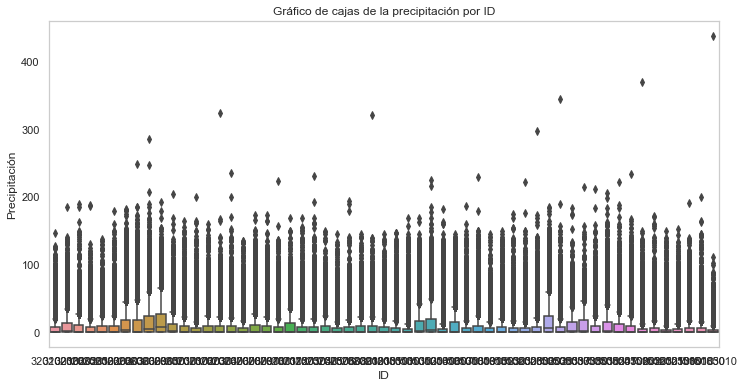

In [39]:
# Crear una figura y un conjunto de ejes en matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de cajas con seaborn
sns.boxplot(x='ID', y='prec', data=data, ax=ax)

# Personalizar las etiquetas y el aspecto del gráfico
ax.set_xlabel("ID")
ax.set_ylabel("Precipitación")
ax.set_title("Gráfico de cajas de la precipitación por ID")
ax.grid(axis='y')

# Mostrar el gráfico
plt.show()


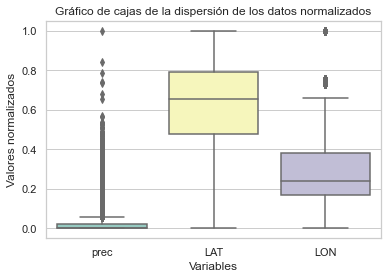

In [38]:
sns.boxplot(data=data_normalized[['prec', 'LAT', 'LON']], palette="Set3")
# Etiquetas personalizadas
plt.xlabel("Variables")
plt.ylabel("Valores normalizados")
plt.title("Gráfico de cajas de la dispersión de los datos normalizados")

# Mostrar el gráfico
plt.show()

### Evaluacion del modelo


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Codigo para intentar evualar


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando solo la columna 'prec'
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['ID'])

# Realizar la imputación en todo el conjunto de datos de entrenamiento
imputed_train_data = impute_precipitation_parallel(train_data)

# Realizar la imputación en todo el conjunto de datos de prueba
imputed_test_data = impute_precipitation_parallel(test_data)

# Calcular el rendimiento de la imputación para cada estación en el conjunto de prueba
# Calcular el rendimiento de la imputación para cada estación en el conjunto de prueba
evaluation_results = {}
for station_id in test_data['ID'].unique():
    station_test_data = imputed_test_data[imputed_test_data['ID'] == station_id]
    
    # Filtrar solo las filas que contienen valores imputados en la columna 'prec'
    imputed_rows = station_test_data[station_test_data['prec'].isna()]
    
    if not imputed_rows.empty:
        # Combinar el conjunto de datos imputado con el conjunto de datos original de prueba para recuperar los valores reales
        real_and_imputed = imputed_rows[['ID', 'Date', 'prec_imputed']].merge(test_data[['ID', 'Date', 'prec']], on=['ID', 'Date'], how='left')

        # Eliminar filas con valores NaN en 'prec_imputed' o 'prec'
        real_and_imputed = real_and_imputed.dropna(subset=['prec_imputed', 'prec'])
        
        if not real_and_imputed.empty:
            # Comparar los valores imputados con los valores originales en el conjunto de prueba
            imputed_values = real_and_imputed['prec_imputed']
            real_values = real_and_imputed['prec']
            
            # Evaluar el rendimiento de la imputación
            rmse, r2, mae = evaluate_imputation_performance(real_values, imputed_values)
            
            evaluation_results[station_id] = {
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae
            }
        else:
            evaluation_results[station_id] = {
                'RMSE': None,
                'R2': None,
                'MAE': None
            }
    else:
        evaluation_results[station_id] = {
            'RMSE': None,
            'R2': None,
            'MAE': None
        }

# Imprimir los resultados de la evaluación
for station_id, performance in evaluation_results.items():
    print(f"Estación {station_id}:")
    if performance['RMSE'] is not None:
        print(f"  RMSE: {performance['RMSE']:.3f}")
        print(f"  R2: {performance['R2']:.3f}")
        print(f"  MAE: {performance['MAE']:.3f}")
    else:
        print("  No hay valores faltantes en los datos de prueba para esta estación.")
    print()


data.info()


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Aplicar KNNImputer en todo el conjunto de datos de entrenamiento
imputed_train_data = impute_precipitation_parallel(train_data)

# Aplicar KNNImputer en todo el conjunto de datos de prueba
imputed_test_data = impute_precipitation_parallel(test_data)

# Filtrar las filas del conjunto de prueba que originalmente tenían valores faltantes en 'prec'
test_data_with_missing = test_data[test_data['prec'].isna()]

# Obtener solo las filas correspondientes en el conjunto de datos imputados
imputed_test_data_with_missing_values = imputed_test_data[imputed_test_data.index.isin(test_data_with_missing.index)]

# Imprimir el conjunto de datos con valores imputados
print(imputed_test_data_with_missing_values)

# Comparar los valores imputados con los valores reales en 'prec' para calcular RMSE y MAE
y_true = test_data_with_missing['prec']
y_pred = imputed_test_data_with_missing_values.loc[y_true.index, 'prec_imputed']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


Intento de evaluacion

In [43]:
datosmetacomople = data.dropna()
datosmetacomople.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592124 entries, 0 to 656435
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    592124 non-null  object 
 1   prec    592124 non-null  float64
 2   ID      592124 non-null  int64  
 3   LAT     592124 non-null  float64
 4   LON     592124 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.1+ MB


In [53]:
datosmetacomople = data.dropna()
from joblib import Parallel, delayed
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def impute_precipitation_for_station(station_data, columns=['prec'], n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    station_data_imputed = imputer.fit_transform(station_data[columns])
    station_data['prec_imputed'] = station_data_imputed[:, 0]
    return station_data

def impute_precipitation_parallel(data, n_jobs=5, columns=['prec']):
    stations = data['ID'].unique()
    results = Parallel(n_jobs=n_jobs)(
        delayed(impute_precipitation_for_station)(data[data['ID'] == station], columns=columns) for station in stations
    )
    imputed_data = pd.concat(results, ignore_index=True)
    return imputed_data

# Cargar y procesar los datos
datosmetacomople['Date'] = pd.to_datetime(datosmetacomople['Date'])

# Introducir valores faltantes aleatoriamente en la columna 'prec'
data_with_missing_values = generate_missing_data(datosmetacomople)

# Realizar la imputación en todo el conjunto de datos con valores faltantes
imputed_data = impute_precipitation_parallel(data_with_missing_values)

def evaluate_imputation_performance(real_values, imputed_values):
    rmse = np.sqrt(mean_squared_error(real_values, imputed_values))
    r2 = r2_score(real_values, imputed_values)
    mae = mean_absolute_error(real_values, imputed_values)
    return rmse, r2, mae

# Calcular el rendimiento de la imputación para cada estación
evaluation_results = {}
for station_id in datosmetacomople['ID'].unique():
    station_data = imputed_data[imputed_data['ID'] == station_id]

    # Filtrar solo las filas que contienen valores imputados en la columna 'prec'
    imputed_rows = station_data[station_data['prec'].isna()]

    if not imputed_rows.empty:
        # Combinar el conjunto de datos imputado con el conjunto de datos original para recuperar los valores reales
        real_and_imputed = imputed_rows[['ID', 'Date', 'prec_imputed']].merge(datosmetacomople[['ID', 'Date', 'prec']], on=['ID', 'Date'], how='left')

        # Eliminar filas con valores NaN en 'prec_imputed' o 'prec'
        real_and_imputed = real_and_imputed.dropna(subset=['prec_imputed', 'prec'])

        if not real_and_imputed.empty:
            # Comparar los valores imputados con los valores originales
            imputed_values = real_and_imputed['prec_imputed']
            real_values = real_and_imputed['prec']

            # Evaluar el rendimiento de la imputación
            rmse, r2, mae = evaluate_imputation_performance(real_values, imputed_values)
            evaluation_results[station_id] = {
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae
            }

C:\Users\ronal\AppData\Local\Temp\ipykernel_18436\2071428723.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosmetacomople['Date'] = pd.to_datetime(datosmetacomople['Date'])


In [59]:
# Imprimir los resultados de la evaluación
for station_id, performance in evaluation_results.items():
    print(f"ID de Estación {station_id}:")
    if performance['RMSE'] is not None:
        print(f"  RMSE: {performance['RMSE']:.3f}")
        print(f"  R2: {performance['R2']:.3f}")
        print(f"  MAE: {performance['MAE']:.3f}")
    else:
        print("  No hay valores faltantes en los datos para esta estación.")
    print()


ID de Estación 32010010:
  RMSE: 14.153
  R2: -0.000
  MAE: 9.153

ID de Estación 32020020:
  RMSE: 19.156
  R2: -0.001
  MAE: 12.829

ID de Estación 32030020:
  RMSE: 16.335
  R2: -0.000
  MAE: 11.067

ID de Estación 32035010:
  RMSE: 14.936
  R2: -0.000
  MAE: 9.532

ID de Estación 32035020:
  RMSE: 14.923
  R2: -0.001
  MAE: 9.732

ID de Estación 32060020:
  RMSE: 17.453
  R2: -0.000
  MAE: 11.447

ID de Estación 32060030:
  RMSE: 22.519
  R2: -0.000
  MAE: 15.669

ID de Estación 32060060:
  RMSE: 23.731
  R2: -0.002
  MAE: 16.492

ID de Estación 32060090:
  RMSE: 29.031
  R2: -0.004
  MAE: 20.283

ID de Estación 32060100:
  RMSE: 26.283
  R2: -0.000
  MAE: 18.547

ID de Estación 32065010:
  RMSE: 19.285
  R2: -0.000
  MAE: 12.653

ID de Estación 32070010:
  RMSE: 17.195
  R2: -0.000
  MAE: 10.559

ID de Estación 32070020:
  RMSE: 14.949
  R2: -0.000
  MAE: 9.635

ID de Estación 32070030:
  RMSE: 16.251
  R2: -0.000
  MAE: 11.227

ID de Estación 32070040:
  RMSE: 13.335
  R2: -0.007

In [69]:
import pandas as pd
ids = [32010010, 32020020, 32030020, 32035010, 32035020, 32060020, 32060030, 32060060, 32060090, 32060100, 32065010, 32070010, 32070020, 32070030, 32070040, 32070060, 32070080, 32070090, 32070100, 32070110, 32070120, 32075030, 32075040, 32075050, 32075060, 32075080, 32080010, 32090010, 32120010, 33035010, 35010010, 35010020, 35010040, 35010060, 35010070, 35010080, 35010090, 35010150, 35010230, 35015050, 35020060, 35025020, 35030020, 35030050, 35030370, 35030380, 35035010, 35035020, 35035070, 35045020, 35100020, 35105050, 35120010, 35125010, 35130010, 35180030, 35185010]

# Vector con los valores de RMSE
rmse = [14.153, 19.156, 16.335, 14.936, 14.923, 17.453, 22.519, 23.731, 29.031, 26.283, 19.285, 17.195, 14.949, 16.251, 13.335, 15.976, 14.516, 18.775, 14.860, 16.732, 17.569, 15.911, 14.804, 15.802, 13.189, 15.883, 16.292, 14.741, 14.810, 15.882, 17.115, 20.474, 23.985, 17.156, 20.805, 14.840, 18.824, 14.455, 15.459, 15.080, 16.055, 15.438, 25.852, 20.388, 20.430, 26.506, 20.573, 20.344, 17.260, 17.723, 16.046, 17.500, 15.202, 12.873, 15.972, 15.185, 11.813]
R2 = [-0.000, -0.001, -0.000, -0.000, -0.001, -0.000, -0.000, -0.002, -0.004, -0.000, -0.000, -0.000, -0.007, -0.001, -0.000, -0.003, -0.000, -0.000, -0.001, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.000, -0.000, -0.001, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.002, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.001, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.006, -0.003, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.002, -0.000, -0.000, -0.000, -0.000, -0.006, -0.003]

MAE = [9.153, 12.829, 11.067, 9.532, 9.732, 11.447, 15.669, 16.492, 20.283, 18.547, 12.653, 10.559, 9.635, 11.227, 9.438, 10.451, 9.653, 12.646, 9.770, 10.534, 12.474, 10.089, 9.689, 10.596, 8.847, 9.987, 10.606, 10.234, 10.141, 9.814, 10.123, 14.677, 16.516, 10.423, 14.371, 9.341, 11.682, 9.409, 10.210, 9.349, 9.993, 10.190, 18.341, 11.545, 13.808, 18.098, 12.096, 14.368, 12.235, 11.579, 9.822, 10.177, 8.952, 8.479, 10.338, 9.872, 7.618]


data2 = {'ids': ids, 'rmse': rmse, 'R2': R2, 'MAE': MAE}
df = pd.DataFrame(data2)

ValueError: All arrays must be of the same length

In [66]:
evaluation_results_df = pd.DataFrame(columns=['ID de estación', 'RMSE', 'R2', 'MAE'])


evaluation_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID de estación  0 non-null      object
 1   RMSE            0 non-null      object
 2   R2              0 non-null      object
 3   MAE             0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [65]:
for station_id, performance in evaluation_results.items():
if performance['RMSE'] is not None:
evaluation_results_df = evaluation_results_df.append({
'Station ID': station_id,
'RMSE': performance['RMSE'],
'R2': performance['R2'],
'MAE': performance['MAE']
}, ignore_index=True)

IndentationError: expected an indented block after 'for' statement on line 1 (2594399700.py, line 2)

## Bibliografia 

Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data (Vol. 333). John Wiley & Sons.

### Correlacion espacial

In [3]:
pip install pysal

     -------------------------------------- 331.8/331.8 KB 1.4 MB/s eta 0:00:00
     -------------------------------------- 275.7/275.7 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 50.1/50.1 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 41.8/41.8 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 141.3/141.3 KB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.4/58.4 KB ? eta 0:00:00
     -----------------------------------

You should consider upgrading via the 'c:\Users\ronal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pysal as ps
import geopandas as gpd

# Cargar datos espaciales (por ejemplo, un archivo shapefile)
gdf = gpd.read_file('path_to_shapefile.shp')
# Matriz de pesos espaciales
w = ps.lib.weights.Queen.from_dataframe(gdf)
# Variable a analizar
y = gdf['column_name'].values
# Calculo de Moran's I
mi = ps.explore.esda.Moran(y, w)
print(mi.I, mi.p_sim)


ModuleNotFoundError: No module named 'pysal'

In [ ]:
from pysal.explore.esda import Moran_Local

# Calculo de LISA
lisa = Moran_Local(y, w)
# Visualización
import matplotlib.pyplot as plt
gdf['lisa_cluster'] = lisa.Is
gdf.plot(column='lisa_cluster')
plt.show()
